In [20]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier



In [21]:
data = fetch_openml("mnist_784")
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [22]:
X = data['data']
y = data['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [28]:
X = 255 - X #invertendo preto e branco
X[X<200] = 0

[ 4665 35858 50706 33097 31668 18151  2328 34128]


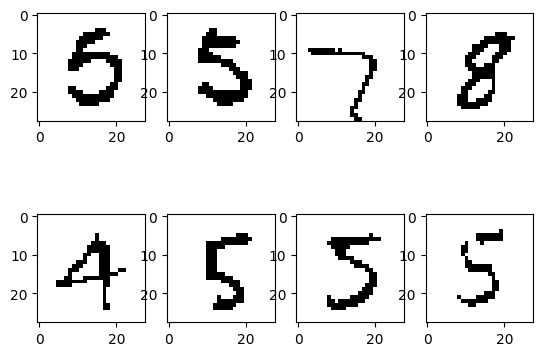

In [50]:
fig, axs = plt.subplots(2,4)
 
idxs = np.random.randint(0, 70_000, size = 8)
print(idxs)
for i in range(8):
    fig.axes[i].imshow(X.iloc[idxs[i]].values.reshape(28,28), cmap = 'gray')
 
plt.show()  

In [52]:
clf = MLPClassifier(hidden_layer_sizes=(382, 191, 80), verbose=True, max_iter=20)
clf.fit(x,y)

Iteration 1, loss = 1.29875592
Iteration 2, loss = 0.23578034
Iteration 3, loss = 0.13521471
Iteration 4, loss = 0.09485682
Iteration 5, loss = 0.08014376
Iteration 6, loss = 0.06879491
Iteration 7, loss = 0.06907255
Iteration 8, loss = 0.06289903
Iteration 9, loss = 0.06112466
Iteration 10, loss = 0.06092242
Iteration 11, loss = 0.05688944
Iteration 12, loss = 0.04843853
Iteration 13, loss = 0.03603720
Iteration 14, loss = 0.03875208
Iteration 15, loss = 0.04463459
Iteration 16, loss = 0.04607878
Iteration 17, loss = 0.03586959
Iteration 18, loss = 0.03787475
Iteration 19, loss = 0.02912728
Iteration 20, loss = 0.03183633


c:\Program Files\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(382, 191, 80), max_iter=20, verbose=True)

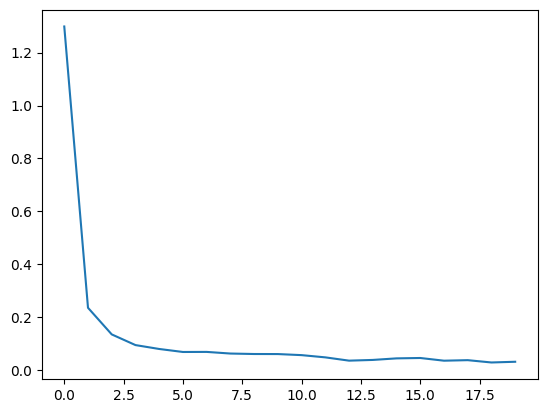

In [53]:
plt.plot(clf.loss_curve_)

In [54]:
with open("model_clf.pkl", "wb") as f:
    pickle.dump(clf, f)